In [2]:
import pandas as pd
from  skimage.io import imread, imshow
import pywt
import pywt.data
import matplotlib.pyplot as plt
import numpy as np
import csv as cvS
import os
from sklearn import svm                                                                                                                
import random
import pandas as pd

Por ejemplo, el archivo
0070038, indica que es la imagen numero 38 de la especie 7. 

(768, 1024, 3)

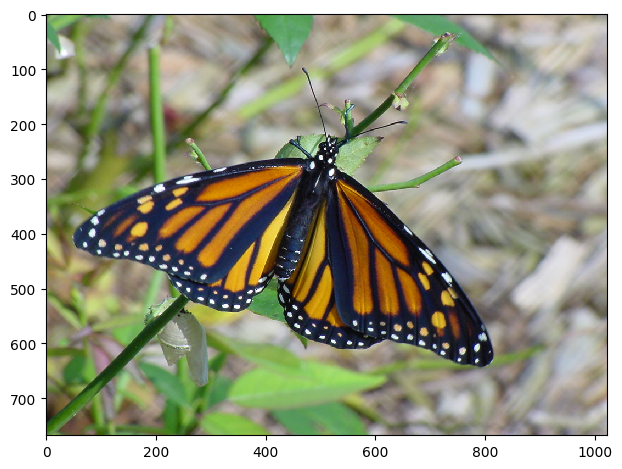

In [4]:

path = "../DB_P1/dataset/"
imagen = path + '0010001.png'
picture = imread(imagen)
imshow(picture)
picture.shape

Test


In [9]:
import cv2

def resize_image(image_path, new_resolution):
    """
    Redimensiona una imagen a una nueva resolución.

    Args:
        image_path (str): Ruta de la imagen de entrada.
        new_resolution (tuple): Tupla que contiene la nueva resolución (ancho, alto).

    Returns:
        numpy.ndarray: Imagen redimensionada.
    """
    # Carga la imagen
    image = cv2.imread(image_path)

    # Redimensiona la imagen a la nueva resolución
    resized_image = cv2.resize(image, new_resolution)

    return resized_image

path = "../DB_P1/dataset/"

nameFiles = os.listdir(path)

for images in nameFiles:
    # Ruta de la imagen de entrada
    input_image_path = "../DB_P1/dataset/" + images

    nameFiles = os.listdir(path)
    # Nueva resolución deseada
    new_resolution = (256, 256)

    # Llama a la función para redimensionar la imagen
    resized_image = resize_image(input_image_path, new_resolution)

    # Puedes guardar la imagen redimensionada si lo deseas
    cv2.imwrite("../DB_P1/dataset_redimention/imagen_redimensionada.jpg", resized_image)


In [78]:
print(picture.shape)
LL, (LH, HL, HH) = pywt.dwt2(picture, 'haar')
print(LL.shape)
LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')

print(LL.shape)
print(LL)

(185, 185, 3)
(185, 93, 2)
(185, 47, 1)
[[[240.  ]
  [283.5 ]
  [347.75]
  ...
  [406.75]
  [386.75]
  [467.  ]]

 [[206.5 ]
  [230.75]
  [268.75]
  ...
  [364.5 ]
  [342.75]
  [405.  ]]

 [[231.5 ]
  [232.  ]
  [255.  ]
  ...
  [374.75]
  [334.75]
  [374.  ]]

 ...

 [[369.25]
  [850.25]
  [694.25]
  ...
  [298.  ]
  [257.5 ]
  [255.  ]]

 [[426.75]
  [881.  ]
  [709.5 ]
  ...
  [303.  ]
  [260.5 ]
  [257.  ]]

 [[520.75]
  [912.5 ]
  [764.75]
  ...
  [347.25]
  [324.75]
  [316.  ]]]


In [73]:
pathList = [] # listas de rutas de las imagenes para clasificarlas ( 10 especies )
nameFiles = os.listdir(path) # te da una lista de todas las rutas de las imagenes

clasificacion = [] # este es una matriz que tendra 10 listas ya que son 10 especies

# Creo la matriz vacia de tamaño 10 
for i in range(1,12):
    lista = [] 
    clasificacion.append(lista) 

#Clasifico las imagenes segun su index - tener en cuenta que la posicion 0 no hay nada
for image in nameFiles : 
    
    clasificacion[int(image[1:3])].append(image) 

print(clasificacion[10])

['0100003.png', '0100005.png', '0100006.png', '0100008.png', '0100009.png', '0100012.png', '0100016.png', '0100018.png', '0100019.png', '0100020.png', '0100022.png', '0100023.png', '0100024.png', '0100025.png', '0100028.png', '0100029.png', '0100030.png', '0100031.png', '0100034.png', '0100036.png', '0100037.png', '0100038.png', '0100039.png', '0100041.png', '0100042.png', '0100044.png', '0100045.png', '0100047.png', '0100050.png', '0100051.png', '0100054.png', '0100058.png', '0100067.png', '0100072.png', '0100077.png', '0100079.png', '0100082.png', '0100086.png', '0100089.png', '0100091.png', '0100092.png', '0100093.png', '0100096.png', '0100097.png', '0100099.png', '0100107.png', '0100110.png', '0100111.png', '0100113.png', '0100115.png', '0100119.png', '0100120.png', '0100122.png', '0100123.png', '0100124.png', '0100126.png', '0100128.png', '0100130.png', '0100132.png', '0100133.png', '0100134.png', '0100136.png', '0100137.png', '0100143.png', '0100145.png', '0100147.png', '0100148.

In [76]:

path = "../DB_P1/dataset/"
# Get_Feacture_file(path,clasificacion[1:11], cortes)
#cont = 0
for i in range(1,11):
     
    LL_list = Get_Feacture_file(path,clasificacion[i],2)
    print(LL_list[0])
    print(len(LL_list[0]))
    break
    #Create_DataBase_CVS("VC_Especie_"+str(i)+".csv",LL_list,i)



[537.5 533.  555.  ... 637.  643.  626. ]
196608


In [75]:
def   Get_Feacture(picture, cortes):
  LL = picture
  for i in range(cortes):
     LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
  return LL.flatten()

In [52]:
def Get_Feacture_file(rutaCarpeta,listaNombre,cortes):
    
    LL_list  = []
    for code in listaNombre:
        ruta = rutaCarpeta + code
        picture = imread(ruta)
        LL_list.append(Get_Feacture(picture,cortes))     
    return LL_list
        
        

In [61]:
def Create_DataBase_CVS(nombreArchivo,LL_list,etiqueta):
    data = {}    

    for i in range(len(LL_list[0])):
        index = "C" + str(i+1)
        data[index] = []            
     
    for vector in LL_list:
        for j in range(len(vector)):
            index = "C" + str(j+1)
            print(index)
            data[index].append(vector[j])       

    data["Etiqueta"] = etiqueta
    df = pd.DataFrame(data)
    df.to_csv(nombreArchivo, index=False) # index=False evita que se incluya el índice en el archivo CSV

# Modelo 



# Loos function

# Update parameters

# Training

# Testing